In [1]:
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir('/content/drive/My Drive/Colab Notebooks/scikitlearn')

import sys
sys.path.append("..")
import bibliotecas as bb

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


FileNotFoundError: ignored

In [0]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
boston = load_boston()

In [0]:
#Em bibliotecas existe uma função chamada dictboston.
# Esta função extrai os nomes das variáveis (features e target)
# e as descrições das mesmas a partir do texto de descrição do
# dataset boston (carregado a partir do scikit-learn)

#Como ela resolve um problema de mineração de texto específico
# ela não é apresentada aqui. Caso queira analisar o código
# fonte, edite o arquivo dictboston.py localizado no diretório
# bibliotecas

nomes = bb.dictboston()
nomes

{'AGE': 'proportion of owner-occupied units built prior to 1940',
 'B': '1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town',
 'CHAS': 'Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)',
 'CRIM': 'per capita crime rate by town',
 'DIS': 'weighted distances to five Boston employment centres',
 'INDUS': 'proportion of non-retail business acres per town',
 'LSTAT': '% lower status of the population',
 'MEDV': "Median value of owner-occupied homes in $1000's",
 'NOX': 'nitric oxides concentration (parts per 10 million)',
 'PTRATIO': 'pupil-teacher ratio by town',
 'RAD': 'index of accessibility to radial highways',
 'RM': 'average number of rooms per dwelling',
 'TAX': 'full-value property-tax rate per $10,000',
 'ZN': 'proportion of residential land zoned for lots over 25,000 sq.ft.'}

In [0]:
# carregando o df
boston_df = pd.DataFrame(data = boston.data, columns = boston.feature_names)
boston_df.sample(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
230,0.53700,0.0,6.20,0.0,0.504,5.981,68.1,3.6715,8.0,307.0,17.4,378.35,11.65
227,0.41238,0.0,6.20,0.0,0.504,7.163,79.9,3.2157,8.0,307.0,17.4,372.08,6.36
491,0.10574,0.0,27.74,0.0,0.609,5.983,98.8,1.8681,4.0,711.0,20.1,390.11,18.07
387,22.59710,0.0,18.10,0.0,0.700,5.000,89.5,1.5184,24.0,666.0,20.2,396.90,31.99
194,0.01439,60.0,2.93,0.0,0.401,6.604,18.8,6.2196,1.0,265.0,15.6,376.70,4.38


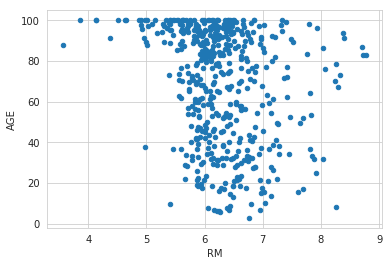

In [0]:
boston_df.plot(kind='scatter', x = 'RM', y = 'AGE')
plt.show()

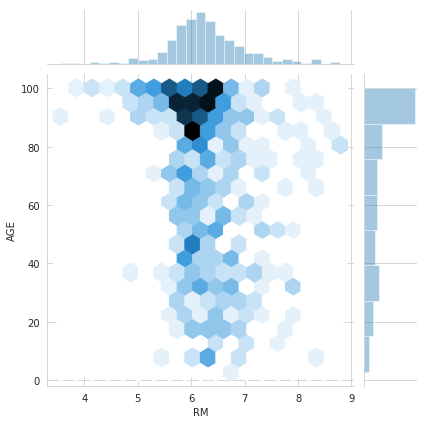

In [0]:
sns.jointplot(data=boston_df, x = 'RM', y = 'AGE', kind = 'hex')
plt.show()

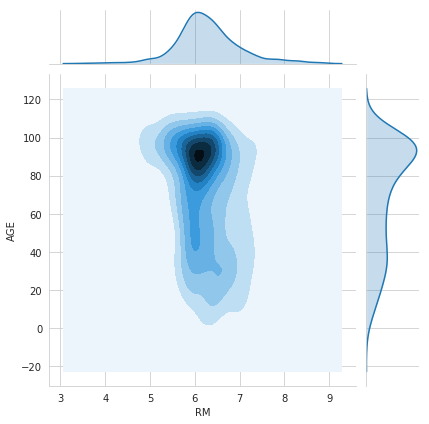

In [0]:
sns.jointplot(data=boston_df, x = 'RM', y = 'AGE', kind = 'kde')
plt.show()

In [0]:
# introduzindo a coluna de precos
boston_df['Preco'] = boston.target
boston_df.sample(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Preco
480,5.82401,0.0,18.10,0.0,0.532,6.242,64.7,3.4242,24.0,666.0,20.2,396.90,10.74,23.0
68,0.13554,12.5,6.07,0.0,0.409,5.594,36.8,6.4980,4.0,345.0,18.9,396.90,13.09,17.4
327,0.24103,0.0,7.38,0.0,0.493,6.083,43.7,5.4159,5.0,287.0,19.6,396.90,12.79,22.2
468,15.57570,0.0,18.10,0.0,0.580,5.926,71.0,2.9084,24.0,666.0,20.2,368.74,18.13,19.1
328,0.06617,0.0,3.24,0.0,0.460,5.868,25.8,5.2146,4.0,430.0,16.9,382.44,9.97,19.3


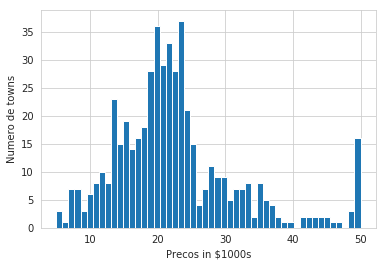

In [0]:
# Histograma dos preços (alvo da predição)
plt.hist(boston_df['Preco'], bins = 50)

# Nome dos eixos
plt.xlabel('Precos in $1000s')
plt.ylabel('Numero de towns')

plt.show()

In [0]:
boston_df_sample = boston_df.sample(frac = 0.1)
len(boston_df), len(boston_df_sample)

(506, 51)

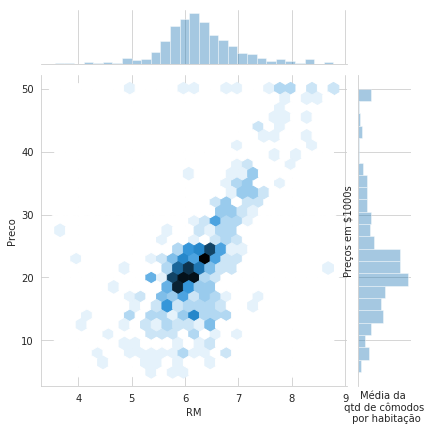

In [0]:
# Plotando a coluna #5 (RM)
# plt.scatter(boston_df['RM'], boston_df['Preco'])

sns.jointplot(data = boston_df, x = 'RM', y = 'Preco', kind = 'hex')

#label
plt.ylabel('Preços em $1000s')
plt.xlabel('Média da \n qtd de cômodos \n por habitação')

plt.show()

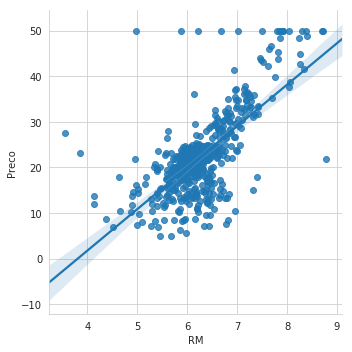

In [0]:
# Vamos predizer o preço a partir de RM
sns.lmplot('RM', 'Preco', data=boston_df, fit_reg=True)
plt.show()

average number of rooms per dwelling


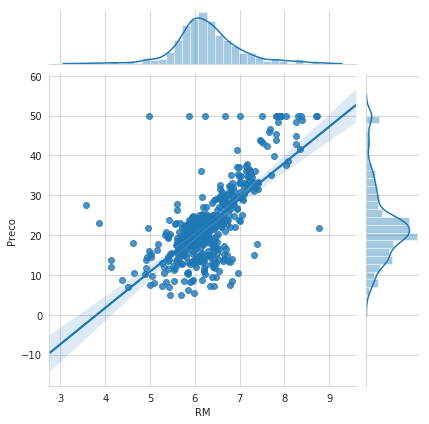

In [0]:
print(nomes['RM'])
sns.jointplot('RM', 'Preco', data=boston_df, kind = 'reg')
plt.show()

In [0]:
# Criamos o modelo 'vazio'
modelo1 = LinearRegression()

# Obtemos as séries de teste reformatando as mesmas para 
#  arrays 2D (nx1) para x e (nx1) para y
x = boston_df['RM'].values.reshape(-1,1)
y = boston_df['Preco'].values.reshape(-1,1)

# Ajustamos o modelo aos dados de entrada e saida
modelo1.fit(x,y)

# Podemos obter os parâmetros de ajuste direto do modelo
print("Parâmetros: b0 =", modelo1.intercept_, " b1 =", modelo1.coef_)

# Ou pedir previsões para novos valores de x
#  Neste caso estamos fazendo duas previsões uma para
#  x=0 e outra para x=1
novos_x = np.array([[0],[1]])
print("Previsões para x =", 0, " e x =", 1)
print(modelo1.predict([[0],[1]]))

Parâmetros: b0 = [-34.67062078]  b1 = [[9.10210898]]
Previsões para x = 0  e x = 1
[[-34.67062078]
 [-25.5685118 ]]


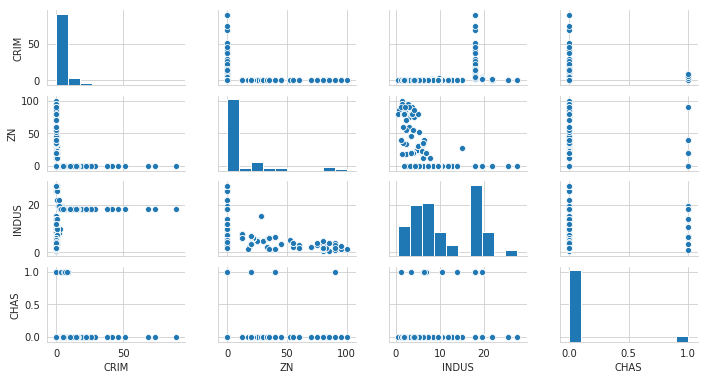

In [0]:
g = sns.pairplot(data=boston_df.iloc[:,:4])
g.fig.set_figheight(5)
g.fig.set_figwidth(10)
plt.show()

In [0]:
# Vamos fazer uma regressão múltipla. Todas as Preco contra todas as demais features (colunas)

# Observe a estrutura do pandas dataframe boston_df
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Preco
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [0]:
# Vamos determinar o número de colunas
# O método .columns nos fornece um indice (algo como um array) com os nomes das colunas
print(boston_df.columns)

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'Preco'],
      dtype='object')


In [0]:
# Para obter o tamanho deste array podemos usar o método .shape
print(boston_df.columns.shape)

(14,)


In [0]:
# Sabemos então que a coluna que desejamos passar para o modelo 
#  como y é a 14. Podemos obte-la como um dataframe pandas 
#  através de um slice passado para .iloc
boston_df.iloc[:,13:14].head()

,Preco
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [0]:
# Este dataframe pode ser transformado em um numpy array 2D
#  através do método .values
boston_df.iloc[:,13:14].head().values

array([[24. ],
       [21.6],
       [34.7],
       [33.4],
       [36.2]])

In [0]:
# Se ao invés de um slice passarmos para .iloc o número 
#  exato da coluna, obtemos a mesma como uma series pandas
boston_df.iloc[:,13].head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: Preco, dtype: float64

In [0]:
# Aplicando o método .values à uma series pandas obteremos
#  como resultado um array numpy 1D
boston_df.iloc[:,13].head().values

array([24. , 21.6, 34.7, 33.4, 36.2])

In [0]:
# Outra opção de trabalho é utilizar os nomes das colunas no slice.
#  Para isto precisamos trabalhar com .loc ao invés de .iloc.
#  Se passarmos apenas o nome de uma coluna, 'Preco' por exemplo,
#  obteremos uma Series Pandas.
boston_df.loc[:,'Preco'].head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: Preco, dtype: float64

In [0]:
# Porém se passarmos uma lista, mesmo que de um único elemento,
#  por exemplo ['Preco'], obteremos um dataframe Pandas.
boston_df.loc[:,['Preco']].head()

,Preco
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [0]:
# Até recentemente, o scikit-learn aceitava somente como input
#  numpy arrays. Isto fazia com que tivessemos de converter os
#  pandas dataframes para seus equivalentes numpy, perdendo os
#  nomes de coluna no processo. Abaixo podemos ver o processo 
#  treinando o modelo linear com as 13 colunas de x e a coluna 
#  de y.
x = boston_df.iloc[:,0:13].values
y = boston_df.iloc[:,[13]].values
modelo1.fit(x,y)
modelo1.intercept_, modelo1.coef_

(array([36.45948839]),
 array([[-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,
          2.68673382e+00, -1.77666112e+01,  3.80986521e+00,
          6.92224640e-04, -1.47556685e+00,  3.06049479e-01,
         -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
         -5.24758378e-01]]))

In [0]:
# A partir da versão 0.20.3 o scikit-learn passou a aceitar
#  pandas dataframes diretamente nos modelos. Podemos ver
#  que o resultado do treino foi o mesmo tanto com o numpy
#  array quanto com o pandas dataframe.
x = boston_df.iloc[:,0:13]
y = boston_df.iloc[:,[13]]
modelo1.fit(x,y)
modelo1.intercept_, modelo1.coef_

(array([36.45948839]),
 array([[-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,
          2.68673382e+00, -1.77666112e+01,  3.80986521e+00,
          6.92224640e-04, -1.47556685e+00,  3.06049479e-01,
         -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
         -5.24758378e-01]]))

In [0]:
boston_df.columns[0:13]

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [0]:
# Vamos criar um pequeno dataframe para manter os nomes dos coeficientes
boston_df.columns.values
coeficientes = pd.DataFrame(data = modelo1.coef_,
                            columns = boston_df.columns[0:13])
coeficientes

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.108011,0.04642,0.020559,2.686734,-17.766611,3.809865,0.000692,-1.475567,0.306049,-0.012335,-0.952747,0.009312,-0.524758


In [0]:
# O dataframe anterior ficou com 1 linha e 13 colunas. Vamos criar
#  um dataframe "transposto". A primeira coluna se chamará 'Feature'
#  e a segunda 'Coeficiente'
coeficientes = pd.DataFrame(data = boston_df.columns[0:13],
                         columns=['Feature'])
coeficientes

,Feature
0,CRIM
1,ZN
2,INDUS
3,CHAS
4,NOX
5,RM
6,AGE
7,DIS
8,RAD
9,TAX


In [0]:
# Para inserir mais uma coluna precisamos que o objeto a ser inserido
#  seja ou 1D ou 2D do tipo (nx1). Como pode ser visto a seguir os 
#  coeficientes de um modelo são do tipo (1xn). 
modelo1.coef_.shape

(1, 13)

In [0]:
# Logo para poder inseri-los como uma coluna no nosso dataframe temos 
#  de transpo-lo.
coeficientes['Coeficiente']=modelo1.coef_.T
coeficientes

,Feature,Coeficiente
0,CRIM,-0.108011
1,ZN,0.046420
2,INDUS,0.020559
3,CHAS,2.686734
4,NOX,-17.766611
5,RM,3.809865
6,AGE,0.000692
7,DIS,-1.475567
8,RAD,0.306049
9,TAX,-0.012335


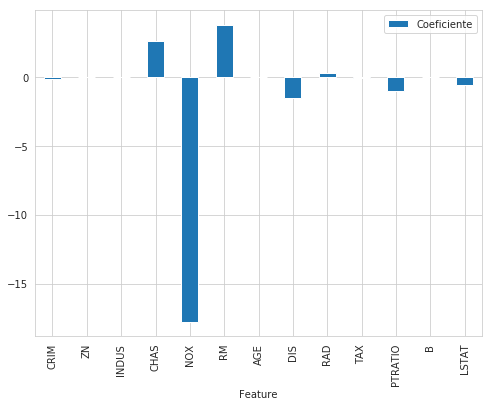

In [0]:
# Vamos plotar estes coeficientes em um gráfico de barras, para ver se
#  existe desbalanceamento entre eles. Para isto precisamos tornar
#  a coluna 'Feature' o index (índice) do nosso dataframe, para em 
#  seguida utilizar o método gráfico .plot do próprio dataframe.
coeficientes.set_index('Feature').plot(kind = 'bar', figsize = (8, 6))
plt.show()

In [0]:
# Vamos recalibrar os coeficientes multiplicando os mesmos pelo
#  valor médio das suas respectivas variáveis.
coeficientes['Media_var']=np.mean(x).values.reshape(-1,1)
coeficientes['Coef_calibrado'] = coeficientes['Coeficiente']*coeficientes['Media_var']
coeficientes

,Feature,Coeficiente,Media_var,Coef_calibrado
0,CRIM,-0.108011,3.613524,-0.390302
1,ZN,0.046420,11.363636,0.527505
2,INDUS,0.020559,11.136779,0.228957
3,CHAS,2.686734,0.069170,0.185841
4,NOX,-17.766611,0.554695,-9.855051
5,RM,3.809865,6.284634,23.943610
6,AGE,0.000692,68.574901,0.047469
7,DIS,-1.475567,3.795043,-5.599839
8,RAD,0.306049,9.549407,2.922591
9,TAX,-0.012335,408.237154,-5.035440


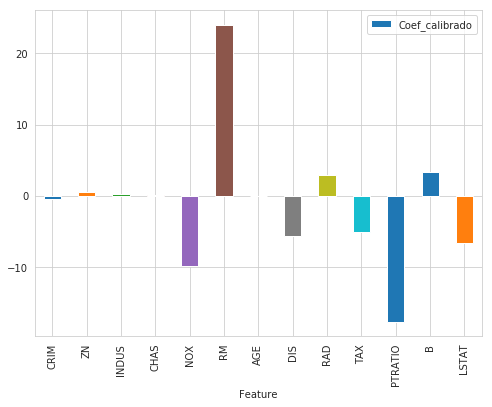

In [0]:
#Plotando os coeficientes recalibrados
coeficientes.set_index('Feature').plot(y='Coef_calibrado', kind = 'bar', figsize = (8, 6))
plt.show()

In [0]:
# Variáveis suspeitas: 
# Eliminando as variáveis suspeitas
x_drop = x.drop(['CRIM', 'ZN', 'INDUS', 'CHAS', 'AGE'], axis=1)
x_drop.head()

,NOX,RM,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.538,6.575,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.469,6.421,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.469,7.185,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.458,6.998,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.458,7.147,6.0622,3.0,222.0,18.7,396.90,5.33


In [0]:
coef_drop = DataFrame(data = x_drop.columns.values,
                      columns = ['Feature'])
coef_drop

,Feature
0,NOX
1,RM
2,DIS
3,RAD
4,TAX
5,PTRATIO
6,B
7,LSTAT


In [0]:
# Retreinando para o novo conjunto
modelo1.fit(x_drop, y)

# Passando os coeficientes para coef_drop
coef_drop['Coeficiente'] = modelo1.coef_.T
coef_drop

,Feature,Coeficiente
0,NOX,-16.727959
1,RM,4.060112
2,DIS,-1.170973
3,RAD,0.243650
4,TAX,-0.010353
5,PTRATIO,-1.106042
6,B,0.010811
7,LSTAT,-0.552298


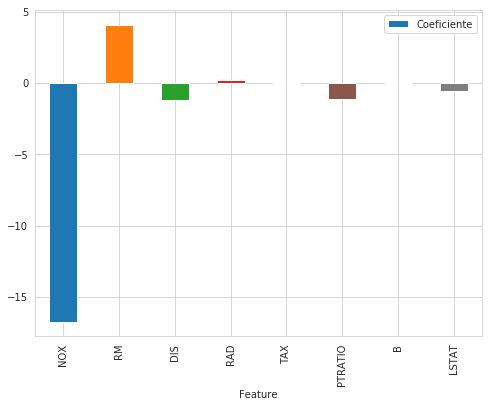

In [0]:
#Plotando os coeficientes recalibrados
coef_drop.set_index('Feature').plot(y='Coeficiente', kind = 'bar', figsize = (8, 6))
plt.show()

In [0]:
# Recalibrando novamente
coef_drop['Media_var']=np.mean(x_drop).values.reshape(-1,1)
coef_drop['Coef_calibrado'] = coef_drop['Coeficiente']*coef_drop['Media_var']
coef_drop

,Feature,Coeficiente,Media_var,Coef_calibrado
0,NOX,-16.727959,0.554695,-9.278916
1,RM,4.060112,6.284634,25.516319
2,DIS,-1.170973,3.795043,-4.443894
3,RAD,0.243650,9.549407,2.326711
4,TAX,-0.010353,408.237154,-4.226595
5,PTRATIO,-1.106042,18.455534,-20.412603
6,B,0.010811,356.674032,3.855867
7,LSTAT,-0.552298,12.653063,-6.988265


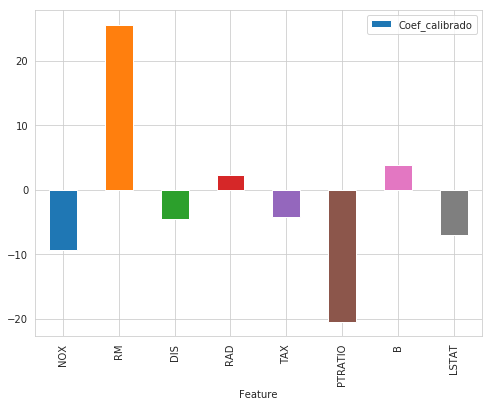

In [0]:
coef_drop.set_index('Feature').plot(y='Coef_calibrado', kind = 'bar', figsize = (8, 6))
plt.show()

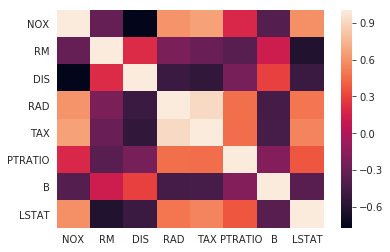

In [0]:
# Vamos elaborar um heatmap das correlações entre as variáveis de entrada
#  para eliminar suspeitas de multicolinearidade.
sns.heatmap(x_drop.corr())
plt.show()

In [0]:
# Dividir o dataset em Treino e Teste. Elaborar um modelo no treino e avaliar
#  o resultado das previsões no teste.
x_train, x_test, y_train, y_test = train_test_split(x_drop, y, test_size = 0.1)

In [0]:
modelo1.fit(x_train, y_train)
print(modelo1.score(x_train, y_train))
print(modelo1.score(x_test, y_test))

0.7295065888093286
0.6470545469625684


In [0]:
# Exercício Extra

#Realizar o cálculo dos coeficientes para variáveis de entrada padronizadas

# Os coeficientes não serão alterados pela padronização das variáveis de entrada
# pois o método dos mínimos quadrados padroniza os resultados (uma vez que o RMS
# usa um cálculo similar ao do desvio padrão). Este exercício será executado para
# treinar o uso dos dataframes pandas e dos numpy arrays.

In [0]:
print(np.mean(x))
np.mean(x).T.shape

CRIM         3.613524
ZN          11.363636
INDUS       11.136779
CHAS         0.069170
NOX          0.554695
RM           6.284634
AGE         68.574901
DIS          3.795043
RAD          9.549407
TAX        408.237154
PTRATIO     18.455534
B          356.674032
LSTAT       12.653063
dtype: float64


(13,)

In [0]:
medias = np.array(np.mean(x)).T.reshape(1,-1)
print(medias)
np.array(np.mean(x)).T.reshape(1,-1).shape

[[3.61352356e+00 1.13636364e+01 1.11367787e+01 6.91699605e-02
  5.54695059e-01 6.28463439e+00 6.85749012e+01 3.79504269e+00
  9.54940711e+00 4.08237154e+02 1.84555336e+01 3.56674032e+02
  1.26530632e+01]]


(1, 13)

In [0]:
desvios = np.array(np.std(x)).T.reshape(1,-1)
print(desvios)
np.array(np.mean(x)).T.reshape(1,-1).shape

[[8.59304135e+00 2.32993957e+01 6.85357058e+00 2.53742935e-01
  1.15763115e-01 7.01922514e-01 2.81210326e+01 2.10362836e+00
  8.69865112e+00 1.68370495e+02 2.16280519e+00 9.12046075e+01
  7.13400164e+00]]


(1, 13)

In [0]:
print(type(x))
x.shape

<class 'pandas.core.frame.DataFrame'>


(506, 13)

In [0]:
x_padr = (np.array(x) - medias)/desvios
x_padr.shape

(506, 13)

In [0]:
modelo1.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [0]:
modelo1.coef_.T.shape

(13, 1)

In [0]:
coeficientes_padr = pd.DataFrame(data = boston_df.columns[0:13],
                                 columns=['Feature'])
coeficientes_padr['Coeficiente'] = modelo1.coef_.T
coeficientes_padr

,Feature,Coeficiente
0,CRIM,-0.108011
1,ZN,0.046420
2,INDUS,0.020559
3,CHAS,2.686734
4,NOX,-17.766611
5,RM,3.809865
6,AGE,0.000692
7,DIS,-1.475567
8,RAD,0.306049
9,TAX,-0.012335


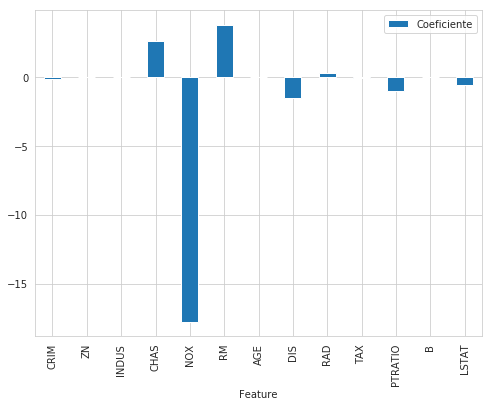

In [0]:
coeficientes_padr.set_index('Feature').plot(kind = 'bar', figsize = (8, 6))
plt.show()